### PART A: ARCH_GARCH Model

In [17]:
import yfinance as yf
from arch import arch_model
import matplotlib.pyplot as plt

In [24]:
# Get the data for Tata Motors
ticker = "TCS.NS"

# Download the data
data = yf.download(ticker, start="2021-04-01", end="2024-03-31")

[*********************100%%**********************]  1 of 1 completed


                      Constant Mean - ARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1244.55
Distribution:                  Normal   AIC:                           2495.10
Method:            Maximum Likelihood   BIC:                           2508.92
                                        No. Observations:                  739
Date:                Wed, Jul 24 2024   Df Residuals:                      738
Time:                        21:25:14   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0442  4.711e-02      0.937      0.349 [-4.81

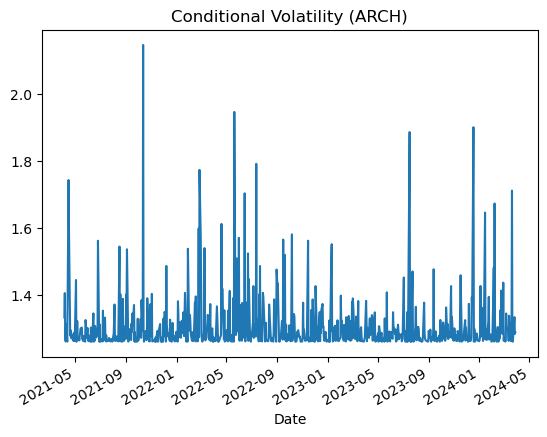

In [25]:
# Create 'Returns' column
data['Returns'] = 100 * data['Adj Close'].pct_change().dropna()

# Fit an ARCH model
arch_model_fit = arch_model(data['Returns'].dropna(), vol='ARCH', p=1).fit(disp='off')
print(arch_model_fit.summary())

# Plot the conditional volatility
arch_model_fit.conditional_volatility.plot(title='Conditional Volatility (ARCH)')
plt.show()

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1242.70
Distribution:                  Normal   AIC:                           2493.41
Method:            Maximum Likelihood   BIC:                           2511.83
                                        No. Observations:                  739
Date:                Wed, Jul 24 2024   Df Residuals:                      738
Time:                        21:27:33   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0450  4.712e-02      0.955      0.340 [-4.73

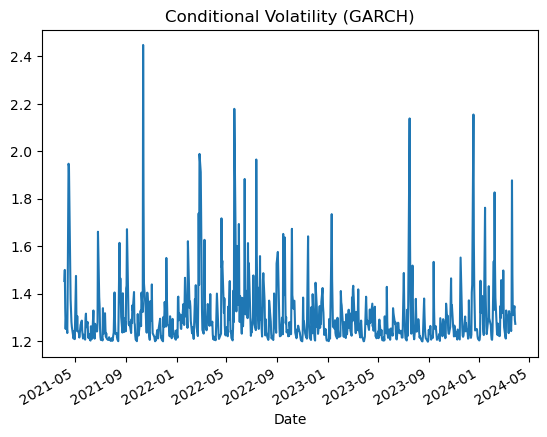

In [28]:
# Drop NaN values from 'Returns'
returns = data['Returns'].dropna()

# Fit a GARCH model
garch_model_fit = arch_model(returns, vol='Garch', p=1, q=1).fit(disp='off')
print(garch_model_fit.summary())

# Plot the conditional volatility
garch_model_fit.conditional_volatility.plot(title='Conditional Volatility (GARCH)')
plt.show()

In [30]:
am = arch_model(returns, vol="Garch", p=1, o=0, q=1, dist="Normal")
res = am.fit(update_freq=10)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1242.7040444972417
            Iterations: 7
            Function evaluations: 44
            Gradient evaluations: 7


In [31]:
forecasts = res.forecast()

In [32]:
type(forecasts)

arch.univariate.base.ARCHModelForecast

In [33]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2024-03-21,3990.050049,4008.399902,3948.000000,3972.949951,3935.142578,3829582,0.051632
2024-03-22,3897.000000,3938.000000,3855.000000,3910.899902,3873.683105,5852485,-1.561811
2024-03-26,3875.000000,3946.699951,3871.449951,3877.500000,3840.600830,3440925,-0.854026
2024-03-27,3888.500000,3895.000000,3829.399902,3840.899902,3804.349121,1968575,-0.943907
2024-03-28,3850.100098,3915.000000,3840.500000,3876.300049,3839.412354,4311783,0.921662


In [34]:
print(forecasts.mean.iloc[-3:])
print(forecasts.residual_variance.iloc[-3:])
print(forecasts.variance.iloc[-3:])

                 h.1
Date                
2024-03-28  0.044999
                 h.1
Date                
2024-03-28  1.583447
                 h.1
Date                
2024-03-28  1.583447


In [35]:
forecasts = res.forecast(horizon=90)
print(forecasts.residual_variance.iloc[-3:])

                h.01      h.02      h.03      h.04      h.05      h.06  \
Date                                                                     
2024-03-28  1.583447  1.658299  1.693964  1.710958  1.719055  1.722913   

                h.07      h.08      h.09      h.10  ...      h.81      h.82  \
Date                                                ...                       
2024-03-28  1.724751  1.725627  1.726045  1.726244  ...  1.726425  1.726425   

                h.83      h.84      h.85      h.86      h.87      h.88  \
Date                                                                     
2024-03-28  1.726425  1.726425  1.726425  1.726425  1.726425  1.726425   

                h.89      h.90  
Date                            
2024-03-28  1.726425  1.726425  

[1 rows x 90 columns]


In [36]:
forecasts.residual_variance

,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10,...,h.81,h.82,h.83,h.84,h.85,h.86,h.87,h.88,h.89,h.90
Date,,,,,,,,,,,,,,,,,,,,,
2024-03-28,1.583447,1.658299,1.693964,1.710958,1.719055,1.722913,1.724751,1.725627,1.726045,1.726244,...,1.726425,1.726425,1.726425,1.726425,1.726425,1.726425,1.726425,1.726425,1.726425,1.726425


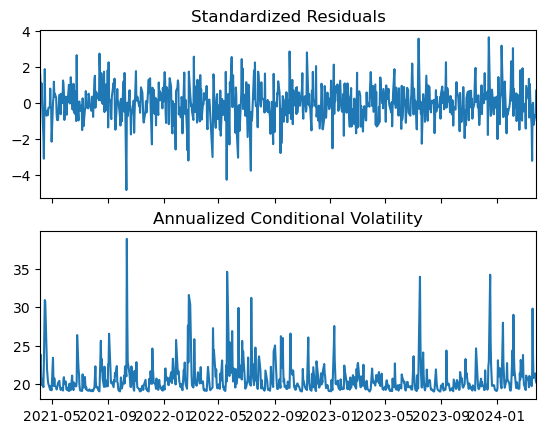

In [37]:
fig = res.plot(annualize="D")
